# Naive Bayes Algorithm 
<img src="Images/NB_Intro.jpg" width="50%">

The Naive Bayes algorithm is simple and effective and should be one of the first methods you try on a classification problem. In this tutorial you are going to learn about the Naive Bayes algorithm including how it works.

## What is Naive Bayes algorithm?

- Based on Baye's Theorem
- Assumes predictors are independent i.e. 'Naive'

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

<img src="Images/NB_f.jpg" width="70%">


### Advantages of Naive Bayes Classifier

### Lets work on Iris dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [3]:
# load the iris datasets
dataset = datasets.load_iris()

In [4]:
model = GaussianNB()
model.fit(dataset.data, dataset.target)


GaussianNB()

### Make Predictions 


In [5]:
expected = dataset.target
predicted = model.predict(dataset.data)

### Summarize the fit of the model

In [6]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


### Variants of Naive Bayes in Scikit Learn

Again, scikit learn (python library) will help here to build a Naive Bayes model in Python. There are three types of Naive Bayes model under scikit learn library:

- **Gausiaan**: It is used in classification and it assumes that features follow a normal distribution.

- **Multinomial**:It is used for discrete counts. For example, let’s say,  we have a text classification problem. We have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

- **Bernoulli**: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones).

## Multinomial Naive Bayes 

In [7]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [8]:
model.fit(dataset.data, dataset.target)
expected = dataset.target
predicted = model.predict(dataset.data)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.92      0.93        50
          2       0.92      0.94      0.93        50

avg / total       0.95      0.95      0.95       150

[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]


## Bernoulli Naive Bayes

In [9]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

In [10]:
model.fit(dataset.data, dataset.target)
expected = dataset.target
predicted = model.predict(dataset.data)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.33      1.00      0.50        50
          1       0.00      0.00      0.00        50
          2       0.00      0.00      0.00        50

avg / total       0.11      0.33      0.17       150

[[50  0  0]
 [50  0  0]
 [50  0  0]]


## Tunning Parameter 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def Naive_bayes(Model_Type):
        # import some data to play with
        iris = datasets.load_iris()
        X = iris.data[:, :2]  # we only take the first two features.
        Y = iris.target
        h = .02  # step size in the mesh
        # we create an instance of Neighbours Classifier and fit the data.
        if(Model_Type=='Gaussian'):
            model =  GaussianNB()
        elif (Model_Type=='Multinomial'):
                model =  MultinomialNB()                         
        else:
                model =  BernoulliNB()  
                
        model.fit(X, Y)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.show()
        
        model.fit(dataset.data, dataset.target)
        expected = dataset.target
        predicted = model.predict(dataset.data)
        print(metrics.classification_report(expected, predicted))
        print(metrics.confusion_matrix(expected, predicted))

In [13]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

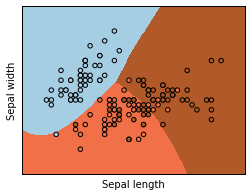

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [14]:
i = interact(Naive_bayes, Model_Type=('Gaussian','Multinomial','Bernoulli'))